In [ ]:
%pip install -qU firecrawl-py==0.0.20 langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.4/404.4 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.8 MB/s eta 0:00:00


In [ ]:
import getpass
import os

if "FIRECRAWL_API_KEY" not in os.environ:
    os.environ["FIRECRAWL_API_KEY"] = getpass.getpass("Enter your Firecrawl API key: ")

Enter your Firecrawl API key: ··········


In [ ]:
!pip install chromaDB langchain-google-genai


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.6/602.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.8/160.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 760.0/760.0 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 87.0 MB/s eta 0:

In [ ]:
import os
import getpass
from langchain.chains import LLMChain
from langchain.schema import Document
from langchain_community.document_loaders import FireCrawlLoader
import google.generativeai as genai
from langchain_community.vectorstores import Chroma
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import PromptTemplate
from langchain.schema import StrOutputParser
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_community.vectorstores.utils import filter_complex_metadata
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import ChatPromptTemplate

os.environ["GOOGLE_API_KEY"] = " please insert you Gemini api key"


In [ ]:
os.environ["GOOGLE_API_KEY"] = " please insert you Gemini api key"

In [ ]:
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro-latest",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [ ]:
# Step 2: Initialize the Loader
loader = FireCrawlLoader(url="https://deepvox.ai/", mode="crawl")

## Split Document

In [ ]:
def process_documents(docs):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=200,
        length_function=len,
    )

    texts = []
    for doc in docs:
        if not isinstance(doc, Document):
            # If for some reason we still get a string or other type
            doc = Document(page_content=str(doc), metadata={})
        chunks = text_splitter.split_documents([doc])
        texts.extend(chunks)

    return texts

## Chroma DB

In [ ]:
# embeddings = Gemini API Embeddings()
vectorstore = Chroma(embedding_function=embeddings, persist_directory="./chroma_db_scrape_fire")

<ipython-input-9-e5fd65302f62>:2: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(embedding_function=embeddings, persist_directory="./chroma_db_scrape_fire")


## Processing, filter and store Pages into Metadata

In [ ]:
# Step 5: Load, Process, and Index in batches
batch_limit = 20
pages = []

try:
    for doc in loader.lazy_load():
        # Wrap the doc content in a Document object if it's not already
        if not isinstance(doc, Document):
            doc = Document(page_content=doc)
        pages.append(doc)
        if len(pages) >= batch_limit:
            # Process the batch of documents
            processed_pages = process_documents(pages)

            # Filter out complex metadata
            filtered_pages = filter_complex_metadata(processed_pages)

            # Index the processed documents
            vectorstore.add_documents(filtered_pages)

            # Clear the pages for the next batch
            pages = []

    # Don't forget to process any remaining pages
    if pages:
        processed_pages = process_documents(pages)

        # Filter out complex metadata
        filtered_pages = filter_complex_metadata(processed_pages)

        # Index the processed documents
        vectorstore.add_documents(filtered_pages)

    # Step 6: Persist the vector store if you haven't already
    vectorstore.persist()

    print("Document processing and indexing complete.")

except Exception as e:
    print(f"An error occurred: {e}")

Document processing and indexing complete.


<ipython-input-10-e6210632b241>:35: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectorstore.persist()


In [ ]:
import pickle

# Function to save pages to a file
def save_pages_to_file(pages, filename='pages.txt'):
    try:
        with open(filename, 'wb') as file:
            pickle.dump(pages, file)
        print(f"Pages have been saved to {filename}")
    except Exception as e:
        print(f"An error occurred while saving the pages: {e}")

# Example usage:
save_pages_to_file(pages, 'pages_batch.txt')


Pages have been saved to pages_batch.txt


In [ ]:
retriever = vectorstore.as_retriever()

In [ ]:
# Define the RAG prompt template
rag_prompt = PromptTemplate(
    template="""
You are a well-informed assistant. Use the following pieces of context to answer the question at the end.
If you don't know the answer, simply state that you don't know; do not attempt to fabricate an answer.
Keep your response to three sentences maximum and ensure it is concise.
Always return the answer in JSON format, including the source of the document.

QUESTION: {question}
CONTEXT: {context}
answer:

 """,
    input_variables=["question", "context"],
)

In [ ]:
rag_prompt_chain = rag_prompt | llm | StrOutputParser()

## Result

In [ ]:
question = """ what is Deepvox.ai?
"""
context = retriever.invoke(question)
result = rag_prompt_chain.invoke({"question": question, "context": context})

print(result)

```json
{
 "answer": "Deepvox.ai is a company that provides AI and automation solutions to businesses.  They offer services such as generative AI, predictive analytics, and intelligent systems to drive innovation and efficiency across industries. Their goal is to make AI accessible and impactful for businesses of all sizes.",
 "source": "https://deepvox.ai/ and https://deepvox.ai/about.html"
}
```


In [ ]:
question = """ How deepvox.ai works ?
"""
context = retriever.invoke(question)
result = rag_prompt_chain.invoke({"question": question, "context": context})

In [ ]:
print(result)

```json
{
 "answer": "Deepvox.ai is a company that provides AI and automation solutions to businesses.  They specialize in generative AI, predictive analytics, and intelligent systems to drive innovation and efficiency across industries.  Their services include things like multilingual customer support, AI-assisted voice bots, and computer vision systems for quality control in manufacturing.",
 "source": "https://deepvox.ai/, https://deepvox.ai/index.html, https://deepvox.ai/services.html, https://deepvox.ai/about.html"
}
```


## First page data

In [ ]:
print(pages[0])

page_content='[![](https://deepvox.ai/assets/images/immersive-ai_logo.png)](./index.html)

*   [Home](./index.html)
    
*   [About](./about.html)
    
*   [What we offer](#)
    
    *   [Services](./services.html)
        
    *   [Projects](./projects.html)
        
    
*   [FAQ's](./faqs.html)
    
*   [Let’s Talk](./contact.html)
    

![](https://deepvox.ai/assets/images/best_image.png)

Artificial Intelligence

Bring Force of Artificial Intelligence To Your Business Development

![](https://deepvox.ai/assets/images/banner_white_line.png)

[Read More](./about.html)
 [Contact Us](./contact.html)

![](https://deepvox.ai/assets/images/banner_image_ai.jpg)

![](https://deepvox.ai/assets/images/banner_image_top_shape.png)

![](https://deepvox.ai/assets/images/banner_image_bottom_shape.png)

![](https://deepvox.ai/assets/images/banner_left_image_ai.jpg)

[![](https://deepvox.ai/assets/images/scroll_down_image.png)](#footer_section)

![](https://deepvox.ai/assets/images/banner_top_shap

In [ ]:
print(processed_pages[0])

page_content='[![](https://deepvox.ai/assets/images/immersive-ai_logo.png)](./index.html)

*   [Home](./index.html)
    
*   [About](./about.html)
    
*   [What we offer](#)
    
    *   [Services](./services.html)
        
    *   [Projects](./projects.html)
        
    
*   [FAQ's](./faqs.html)
    
*   [Let’s Talk](./contact.html)
    

![](https://deepvox.ai/assets/images/best_image.png)

Artificial Intelligence

Bring Force of Artificial Intelligence To Your Business Development

![](https://deepvox.ai/assets/images/banner_white_line.png)

[Read More](./about.html)
 [Contact Us](./contact.html)

![](https://deepvox.ai/assets/images/banner_image_ai.jpg)

![](https://deepvox.ai/assets/images/banner_image_top_shape.png)

![](https://deepvox.ai/assets/images/banner_image_bottom_shape.png)

![](https://deepvox.ai/assets/images/banner_left_image_ai.jpg)

[![](https://deepvox.ai/assets/images/scroll_down_image.png)](#footer_section)' metadata={'title': 'Home | DeepVox-AI', 'language': 

In [ ]:
print( filtered_pages[0])

page_content='[![](https://deepvox.ai/assets/images/immersive-ai_logo.png)](./index.html)

*   [Home](./index.html)
    
*   [About](./about.html)
    
*   [What we offer](#)
    
    *   [Services](./services.html)
        
    *   [Projects](./projects.html)
        
    
*   [FAQ's](./faqs.html)
    
*   [Let’s Talk](./contact.html)
    

![](https://deepvox.ai/assets/images/best_image.png)

Artificial Intelligence

Bring Force of Artificial Intelligence To Your Business Development

![](https://deepvox.ai/assets/images/banner_white_line.png)

[Read More](./about.html)
 [Contact Us](./contact.html)

![](https://deepvox.ai/assets/images/banner_image_ai.jpg)

![](https://deepvox.ai/assets/images/banner_image_top_shape.png)

![](https://deepvox.ai/assets/images/banner_image_bottom_shape.png)

![](https://deepvox.ai/assets/images/banner_left_image_ai.jpg)

[![](https://deepvox.ai/assets/images/scroll_down_image.png)](#footer_section)' metadata={'title': 'Home | DeepVox-AI', 'language': 

Document(metadata={'title': 'deepvox.ai', 'language': 'en', 'sourceURL': 'https://deepvox.ai/assets/videos/ai_first_video.mp4', 'pageStatusCode': 200, 'ogLocaleAlternate': []}, page_content='deepvox.ai is blocked\n=====================\n\nThis page has been blocked by Chrome\n\nERR\\_BLOCKED\\_BY\\_CLIENT\n\nnull\n\nReload\n\nThis page has been blocked by Chrome\n\n ')
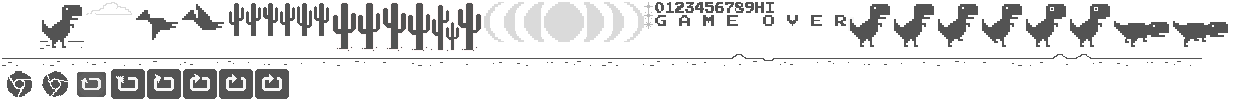
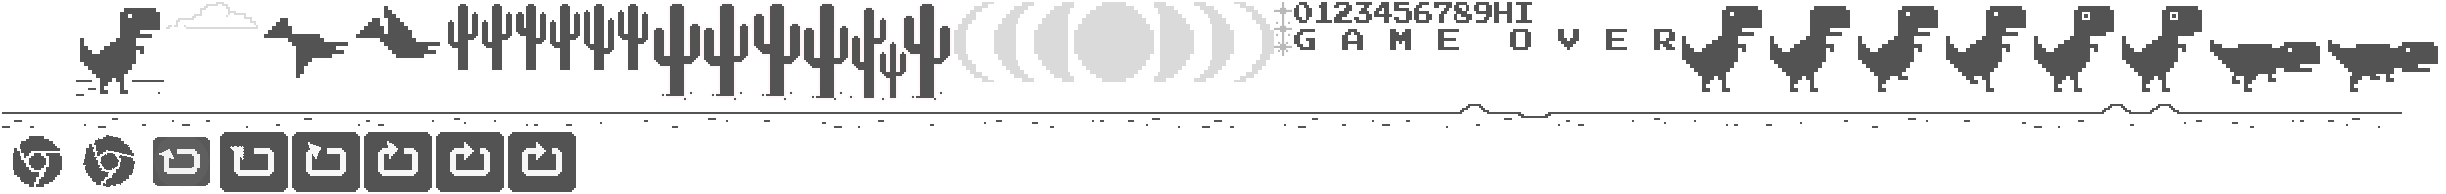

In [ ]:
doc

In [ ]:
# Assuming context and result are generated from the retriever and rag_prompt_chain respectively
question = """ what is Deepvox.ai? """
context = retriever.invoke(question)
result = rag_prompt_chain.invoke({"question": question, "context": context})

# Print the result
print(result)

# Save the outputs to a file
def save_output_to_file(question, context, result, filename='output.txt'):
    try:
        with open(filename, 'w') as file:
            file.write("Question:\n")
            file.write(question + "\n\n")

            file.write("Context:\n")
            file.write(str(context) + "\n\n")

            file.write("Result:\n")
            file.write(str(result) + "\n")

        print(f"Output has been saved to {filename}")
    except Exception as e:
        print(f"An error occurred while saving the output: {e}")

# Example usage:
save_output_to_file(question, context, result, 'output.txt')


```json
{
 "answer": "Deepvox.ai is a company that provides AI and automation solutions to businesses.  They specialize in generative AI, predictive analytics, and intelligent systems to drive innovation and efficiency across industries.  Their services include things like multilingual customer support, AI-assisted voice bots, and computer vision systems for quality control in manufacturing.",
 "source": "https://deepvox.ai/, https://deepvox.ai/index.html, https://deepvox.ai/services.html, https://deepvox.ai/about.html"
}
```
Output has been saved to output.txt


In [ ]:
def process_and_save_continuously(process_function, filename='output.txt'):
    """
    Continuously takes input from the user, processes it using a provided function, and saves each input-output pair to a file.

    :param process_function: A function that processes the input and returns an output.
                             It should accept the input_data as an argument.
    :param filename: The name of the file where the input and output should be saved (default is 'output.txt').
    """
    try:
        with open(filename, 'a') as file:  # Open the file in append mode to keep adding content
            while True:
                # Take input from the user
                input_data = input("Enter your question (or type 'exit' to quit): ")

                # Break the loop if the user wants to stop
                if input_data.lower() == 'exit':
                    print("Exiting the program.")
                    break

                # Process the input data using the provided function
                output = process_function(input_data)

                # Write the input and output to the file
                file.write("Input:\n")
                file.write(str(input_data) + "\n\n")

                file.write("Output:\n")
                file.write(str(output) + "\n\n")

                # Print the output for the user to see immediately
                print(f"Output:\n{output}\n")
                print(f"The input and output have been saved to {filename}\n")

    except Exception as e:
        print(f"An error occurred: {e}")

# Example processing function
def example_process_function(input_data):
    # Replace this with the actual processing logic
    context = retriever.invoke(input_data)
    result = rag_prompt_chain.invoke({"question": input_data, "context": context})
    return {"result": result}

# Start the continuous input-output process
process_and_save_continuously(example_process_function, 'output.txt')


Enter your question (or type 'exit' to quit): what is Deepvox.ai
Output:
{'result': '```json\n{\n "answer": "Deepvox.ai is a company that provides AI and automation solutions to businesses.  They specialize in generative AI, predictive analytics, and intelligent systems to drive innovation and efficiency across industries.  Their services include things like AI-assisted voice bots and computer vision systems for quality control.",\n "source": "https://deepvox.ai/ and https://deepvox.ai/services.html"\n}\n```'}

The input and output have been saved to output.txt

Enter your question (or type 'exit' to quit): How to works Deepvox.ai
Output:
{'result': '```json\n{\n "answer": "The context provided does not explain how Deepvox.ai works, it mainly describes the company\'s vision, services, and frequently asked questions.",\n "source": "null"\n}\n```'}

The input and output have been saved to output.txt

Enter your question (or type 'exit' to quit): What services are provide by deepvox.ai
Ou